<a href="https://colab.research.google.com/github/lakshmanpadigala/DataAugmentation_Smai/blob/main/Cutout_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=6561ffb7442ffe989f8580c0ca0a785246c6852b9f68b622ed214322de8b432f
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [57]:
import numpy as np
import torch
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image
from tabulate import tabulate
from sklearn import preprocessing
import wget
import tarfile
from scipy.io import loadmat


In [52]:
url = 'http://ufldl.stanford.edu/housenumbers/train_32x32.mat'
train_file = wget.download(url)

In [53]:
url1 = 'http://ufldl.stanford.edu/housenumbers/test_32x32.mat'
test_file = wget.download(url1)

In [55]:
!mv /content/test_32x32.mat /content/drive/MyDrive/Colab\ Notebooks/SMAI\ Project

In [56]:
!mv /content/train_32x32.mat /content/drive/MyDrive/Colab\ Notebooks/SMAI\ Project

In [51]:
# train_file = tarfile.open('/content/drive/MyDrive/Colab Notebooks/SMAI Project/train.tar.gz')
# test_file = tarfile.open('/content/drive/MyDrive/Colab Notebooks/SMAI Project/test.tar.gz')
# train_file.extractall('/content/drive/MyDrive/Colab Notebooks/SMAI Project')
# test_file.extractall('/content/drive/MyDrive/Colab Notebooks/SMAI Project')
# train_file.close()
# test_file.close()

In [58]:
train = loadmat('/content/drive/MyDrive/Colab Notebooks/SMAI Project/train_32x32.mat')

In [65]:
train.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [66]:
train_x = train['X']
train_y = train['y']
train_x.shape , train_y.shape

((32, 32, 3, 73257), (73257, 1))

In [67]:
test = loadmat('/content/drive/MyDrive/Colab Notebooks/SMAI Project/test_32x32.mat')

In [68]:
test_x = test['X']
test_y = test['y']
test_x.shape , test_y.shape

((32, 32, 3, 26032), (26032, 1))

In [112]:
def cut_out(image,holes,length):
  image =  torch.from_numpy(image).permute(2,0,1)
  print("Image shape",image.shape)
  height = image.shape[1]
  width = image.shape[2]
  for i in range(holes):
    y = np.random.randint(height)
    x = np.random.randint(width)
    mask = np.ones((height, width), np.float32)
    y1 = np.clip(y - length // 2, 0, height)
    y2 = np.clip(y + length // 2, 0, height)
    x1 = np.clip(x - length // 2, 0, width)
    x2 = np.clip(x + length // 2, 0, width)

    mask[y1: y2, x1: x2] = 0

    mask = torch.from_numpy(mask)
    mask = mask.expand_as(image)
    image = image * mask

  return image.permute(1,2,0)      

Image shape torch.Size([3, 32, 32])
Image shape torch.Size([3, 32, 32])
Image shape torch.Size([3, 32, 32])


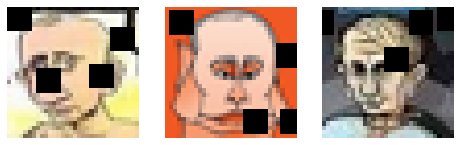

In [121]:
cut_out_img = []
for img in images:
  cut_out_img.append(cut_out(img,4,6))
display_images(cut_out_img,1,3)

In [105]:
del cut_out

In [24]:
opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [100]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        # plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data():
    image_list = []
    im = load_image('/VladimirPutin_0016.png')
    image_list.append(im)
    im = load_image('/VladimirPutin_0019.png')
    image_list.append(im)
    im = load_image('/VladimirPutin_0028.png')
    image_list.append(im)

    image_list = np.array(image_list)

    print("Dataset shape:",image_list.shape)

    return image_list

In [101]:
images = load_data()

Dataset shape: (3, 32, 32, 3)


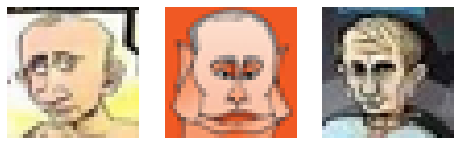

In [102]:
display_images(images,1,3)

In [85]:
T1 = torch.Tensor([[3,2,6],[7,5,3]])
T2 = torch.Tensor([[1,0,1],[1,0,1]])

In [86]:
T1 * T2

tensor([[3., 0., 6.],
        [7., 0., 3.]])

In [96]:
cut_out = []
for img in images:
  mask = np.ones((32,32), np.float32)
  mask[9: 19, 10:18] = 5/255
  mask = torch.from_numpy(mask)
  img =  torch.from_numpy(img).permute(2,0,1)
  mask = mask.expand_as(img)
  temp = img * mask
  cut_out.append(temp.permute(1,2,0))  

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [97]:
type(cut_out[0])

torch.Tensor

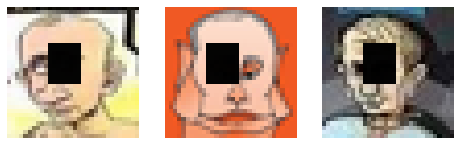

In [93]:
display_images(cut_out,1,3)

In [ ]:
print('Cutout Implementation..!')

Cutout Implementation..!
